In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import pearsonr

In [2]:
colorset = ['#763C87','#1FA2F4','#0569CE','#F48C36','#E54028']
greens = ['#37535e', '#3b748a', '#4095b5', '#52aec9', '#72bfc4', '#93d0bf']

mpl.rcParams.update({
'backend': 'MacOSX',
'text.usetex': 'false',
'font.family': 'Myriad Pro',
'font.size': 18, 
'figure.subplot.hspace': .4,
'figure.subplot.bottom': 0.125, 
'savefig.dpi': 600,
'savefig.format': 'pdf', 
'pdf.fonttype': 42,
'figure.edgecolor': (1, 1, 1, 0), 
'figure.facecolor': (1, 1, 1, 0), 
'figure.figsize': (15.0, 10.0),
'font.weight': 'bold',
'axes.labelweight': 'bold',
'axes.titlesize': 36,
'lines.markersize': 11.200000000000001,
 'ytick.major.width': 1.6,
 'xtick.major.width': 1.6,
 'lines.markeredgewidth': 0.0,
 'xtick.major.pad': 11.200000000000001,
 'ytick.minor.width': 0.8,
 'grid.linewidth': 1.6,
 'lines.linewidth': 2.8000000000000003,
 'ytick.major.pad': 11.200000000000001,
})

In [3]:
min_tags = 20

In [4]:
filename = 'output/clusters/pca_genes_rna_and.txt'
pca = pd.io.parsers.read_csv(filename, 
                             sep='\t', 
                             header=0, index_col=0)
pca.head()

,chr,start,end,strand,Length,Copies,Annotation/Divergence,0-1uM-PCC-24h-1,100uM-K99A-24h-1,10uM-K99A-24h-1,...,10uM-K99A-24h-std,100uM-K99A-24h,100uM-K99A-24h-std,0-1uM-PCC-24h,0-1uM-PCC-24h-std,10uM-PCC-24h,10uM-PCC-24h-std,gene_name,pc1,pc2
id,,,,,,,,,,,,,,,,,,,,,
NM_138659,chr11,75486777,75509447,+,7437,1,Prpf8|AU019467|D11Bwg0410e|DBF3/PRP8|Prp8|Sfpr...,118.612,105.737,93.584,...,23.027639,106.1970,0.650538,112.5910,8.514980,116.6430,3.425225,Prpf8,0.003523,-0.000783
NM_023733,chr5,8966048,8997146,-,2783,1,Crot|1200003H03Rik|-|5 A1|5|protein-coding,5.466,6.038,9.744,...,1.788980,6.4600,0.596798,6.5515,1.535129,5.6485,0.567807,Crot,-0.000422,-0.000263
NM_010824,chr11,87793784,87804412,+,2530,1,Mpo|mKIAA4033|RP23-449P23.5|11 C|11 52.22 cM|p...,5.052,21.501,35.468,...,3.340372,16.1620,7.550486,7.8325,3.932221,2.1120,0.890955,Mpo,-0.002897,-0.002263
NM_172938,chr10,42860512,42960782,+,4734,1,Scml4|9330161D17|mFLJ00197|-|10 B2|10|protein-...,3.143,1.742,8.579,...,4.323251,2.7515,1.427649,3.6125,0.663973,1.1045,0.644174,Scml4,-0.001108,0.002380
NM_026389,chr11,78512296,78522736,+,1938,1,Poldip2|1300003F06Rik|Pdip38|RP23-399H5.6|11 B...,34.750,29.188,20.998,...,7.793024,24.8235,6.172335,27.4805,10.280625,30.8115,4.174051,Poldip2,0.001002,0.003041


In [5]:
filename = '../data/ap1_per_gene.txt'
ap1 = pd.io.parsers.read_csv(filename, 
                             sep='\t', 
                             header=0, index_col=0)

ap1['ap1'] = ap1[['batf_tag_count',
                        'cjun_tag_count',
                        'junb_tag_count',
                        'jund_tag_count',
                        ]].sum(axis=1)
ap1.head()

,chr_name,transcription_start,transcription_end,strand,batf_tag_count,cjun_tag_count,irf4_tag_count,junb_tag_count,jund_tag_count,ap1
sequence_identifier,,,,,,,,,,
NM_001001130,chr13,67747799,67755134,1,15.30,8.87,33.60,0.0,16.1,40.27
NM_001001144,chr9,110333355,110384949,0,26.84,14.30,24.40,27.6,63.5,132.24
NM_001001152,chr13,67254917,67269068,1,27.50,0.00,6.69,0.0,40.6,68.10
NM_001001160,chr6,85469575,85502994,1,0.00,0.00,0.00,0.0,0.0,0.00
NM_001001176,chrX,106206873,106219842,1,0.00,20.50,10.40,0.0,29.1,49.60


In [6]:
# Merge on Refseq ID
pca_ap1 = pd.merge(pca, ap1, how='left', 
                   left_index=True, right_index=True, 
                   suffixes=('','_refseq'))
pca_ap1 = pca_ap1.fillna(0)
print(pca_ap1.shape)
pca_ap1.head()

(3048, 45)


,chr,start,end,strand,Length,Copies,Annotation/Divergence,0-1uM-PCC-24h-1,100uM-K99A-24h-1,10uM-K99A-24h-1,...,chr_name,transcription_start,transcription_end,strand_refseq,batf_tag_count,cjun_tag_count,irf4_tag_count,junb_tag_count,jund_tag_count,ap1
NM_001001182,chr2,59899363,60125740,-,7942,1,Baz2b|5830435C13Rik|BC053917|D2Ertd794e|RP23-3...,7.329,7.425,10.392,...,chr2,59899362,60125740,1,34.5,35.5,29.07,0.0,17.71,87.71
NM_001001493,chr8,85080963,85082339,+,693,1,Wdr83os|-|-|8 C3|8|protein-coding,60.231,61.930,48.867,...,chr8,85080962,85082339,0,0.0,0.0,12.00,0.0,20.20,20.20
NM_001001566,chr1,75474569,75479471,-,3086,1,Chpf|1700028N03Rik|AI414328|D1Bwg1363e|-|1 C4|...,23.684,18.330,13.227,...,chr1,75474568,75479471,1,11.5,95.5,49.10,41.8,162.00,310.80
NM_001001806,chr17,84183928,84187947,-,3529,1,Zfp36l2|Brf2|ERF2|Tis11d|-|17 E4|17|protein-co...,51.574,45.147,88.903,...,chr17,84183927,84187947,1,0.0,99.6,64.10,0.0,58.40,158.00
NM_001001932,chr10,95940663,96045518,+,7805,1,Eea1|A430109M19Rik|B230358H09Rik|ZFYVE2|-|10 C...,23.410,7.237,5.575,...,chr10,95940662,96045518,0,0.0,19.1,23.94,0.0,29.90,49.00


(0.07720014497848747, 1.9835048217324053e-05)


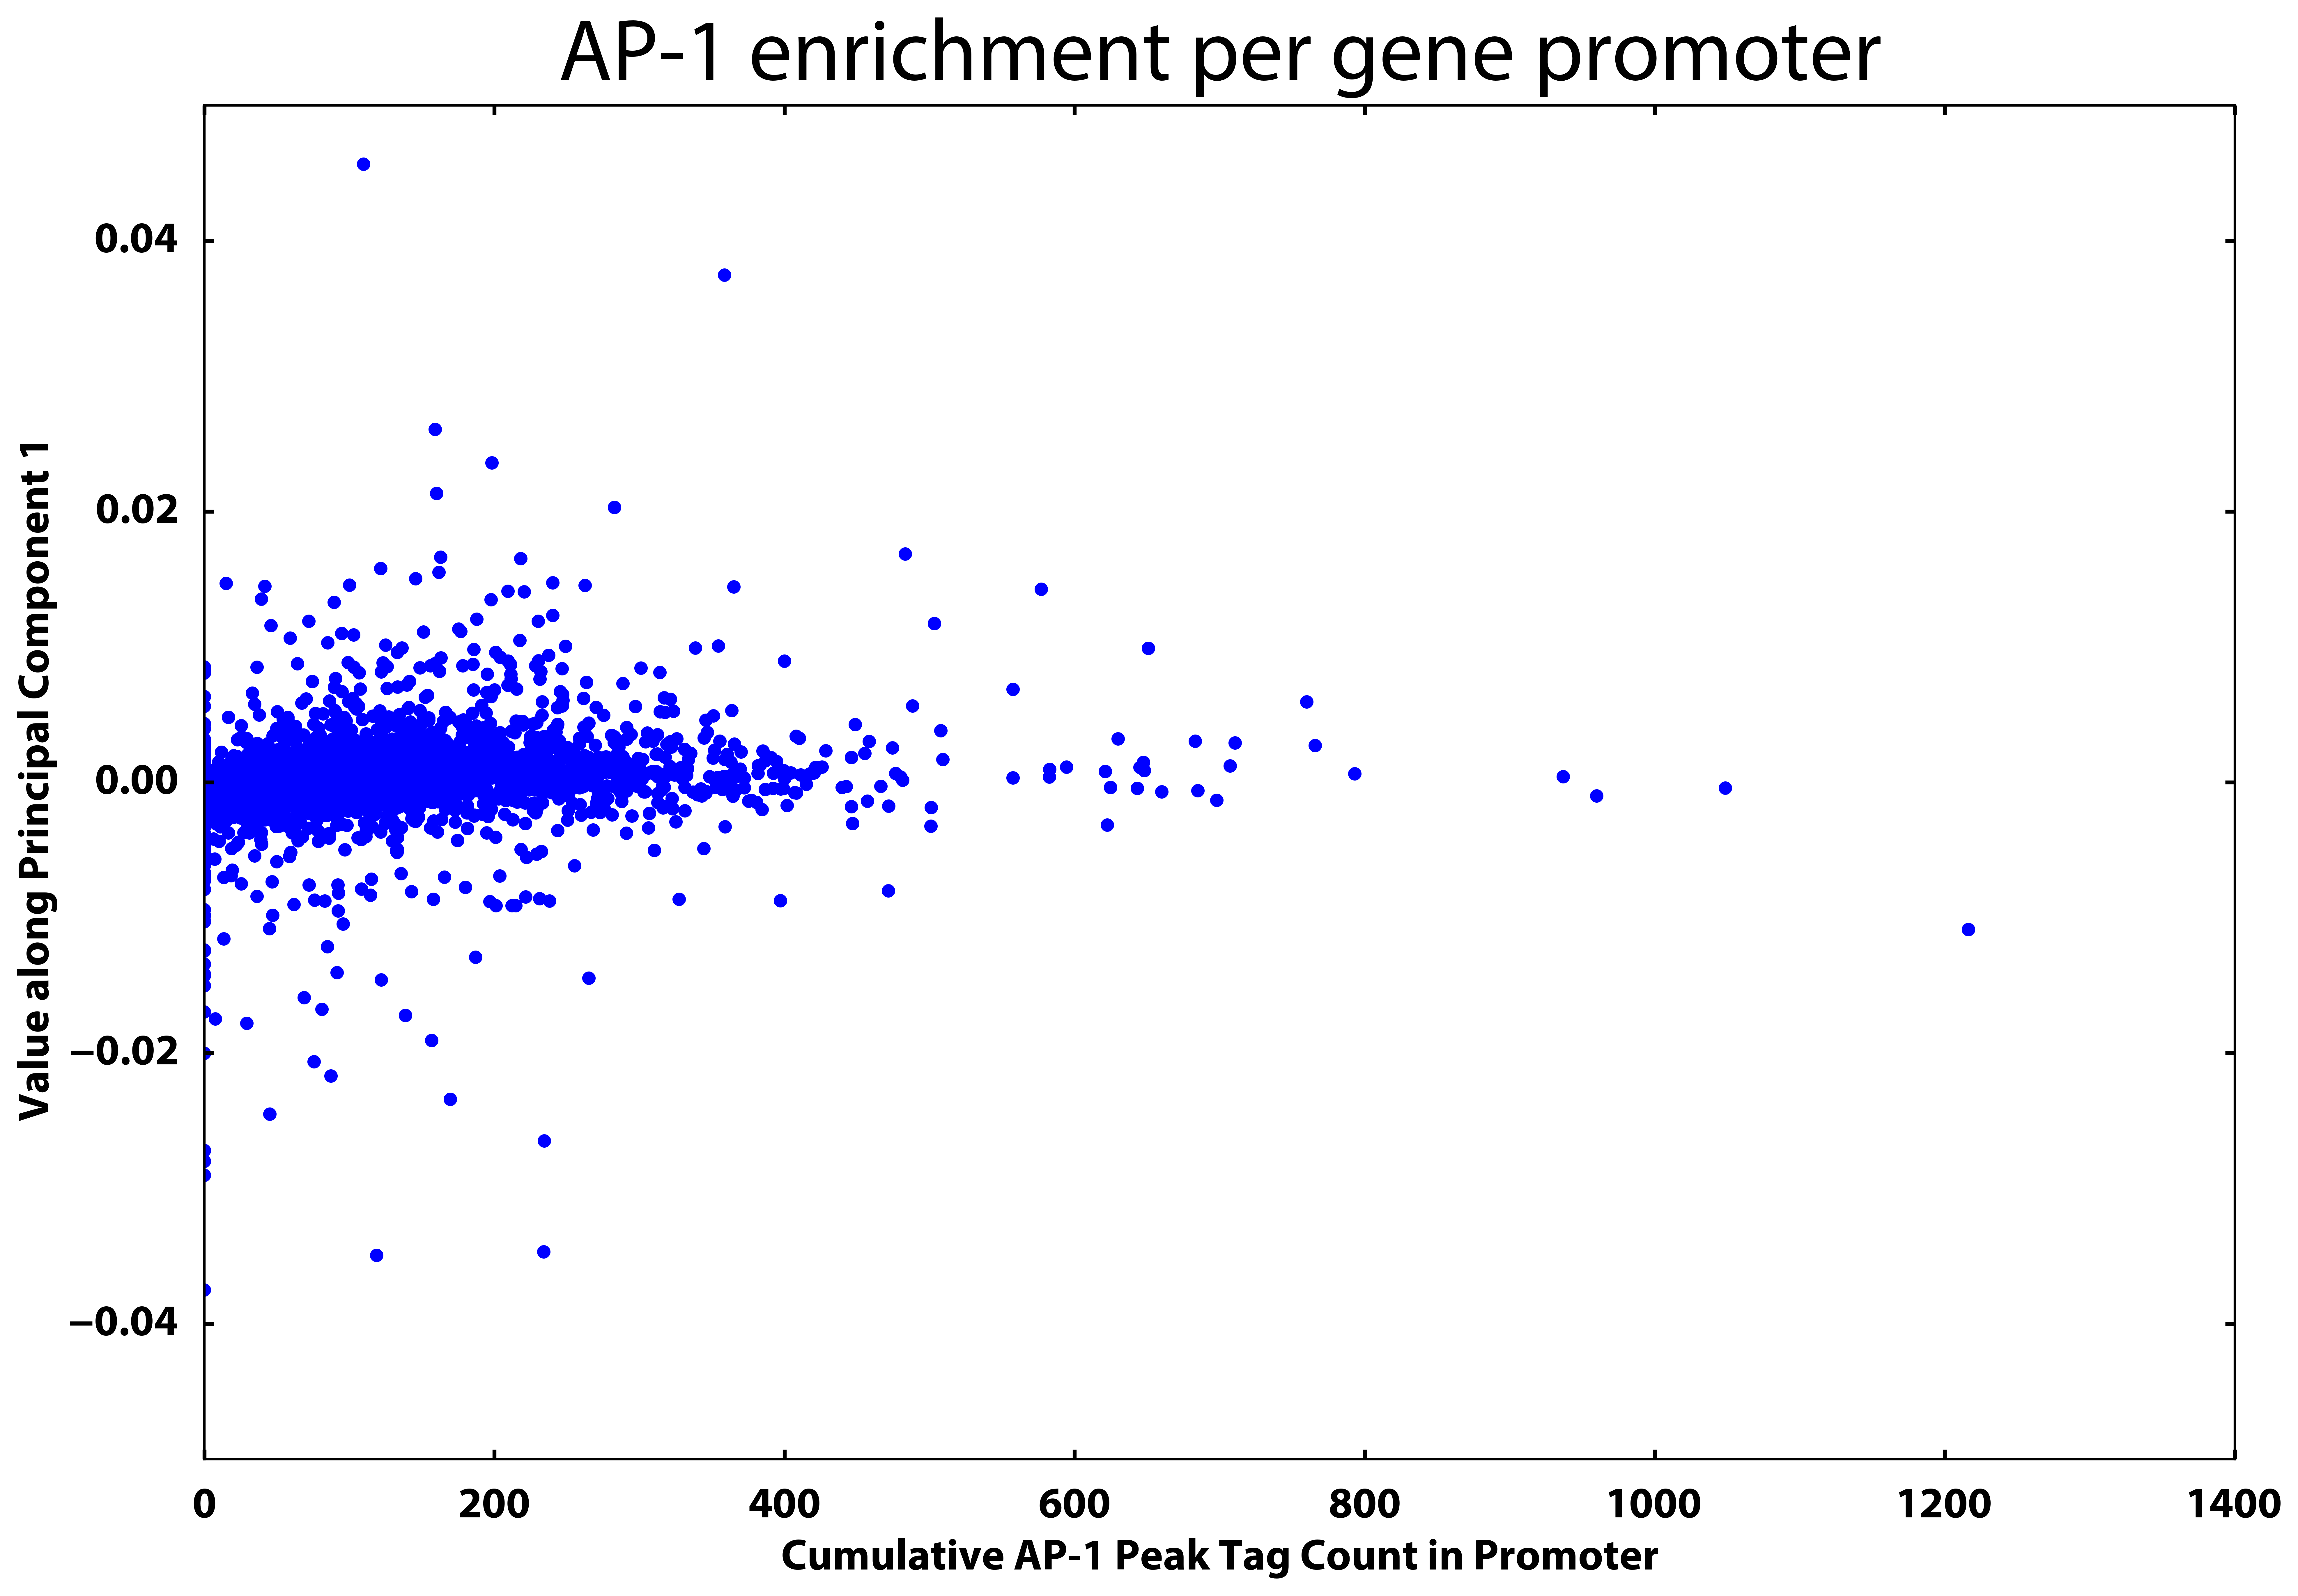

In [8]:
# Per refseq id, plot PC1 value versus total AP1
r = pearsonr(pca_ap1['ap1'], pca_ap1['pc1'])
print(r)

plt.plot(pca_ap1['ap1'], pca_ap1['pc1'], '.')
#plt.xlim([0,400])
plt.ylim([-.05,.05])
plt.ylabel('Value along Principal Component 1')
plt.xlabel('Cumulative AP-1 Peak Tag Count in Promoter')

title = 'AP-1 enrichment per gene promoter'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

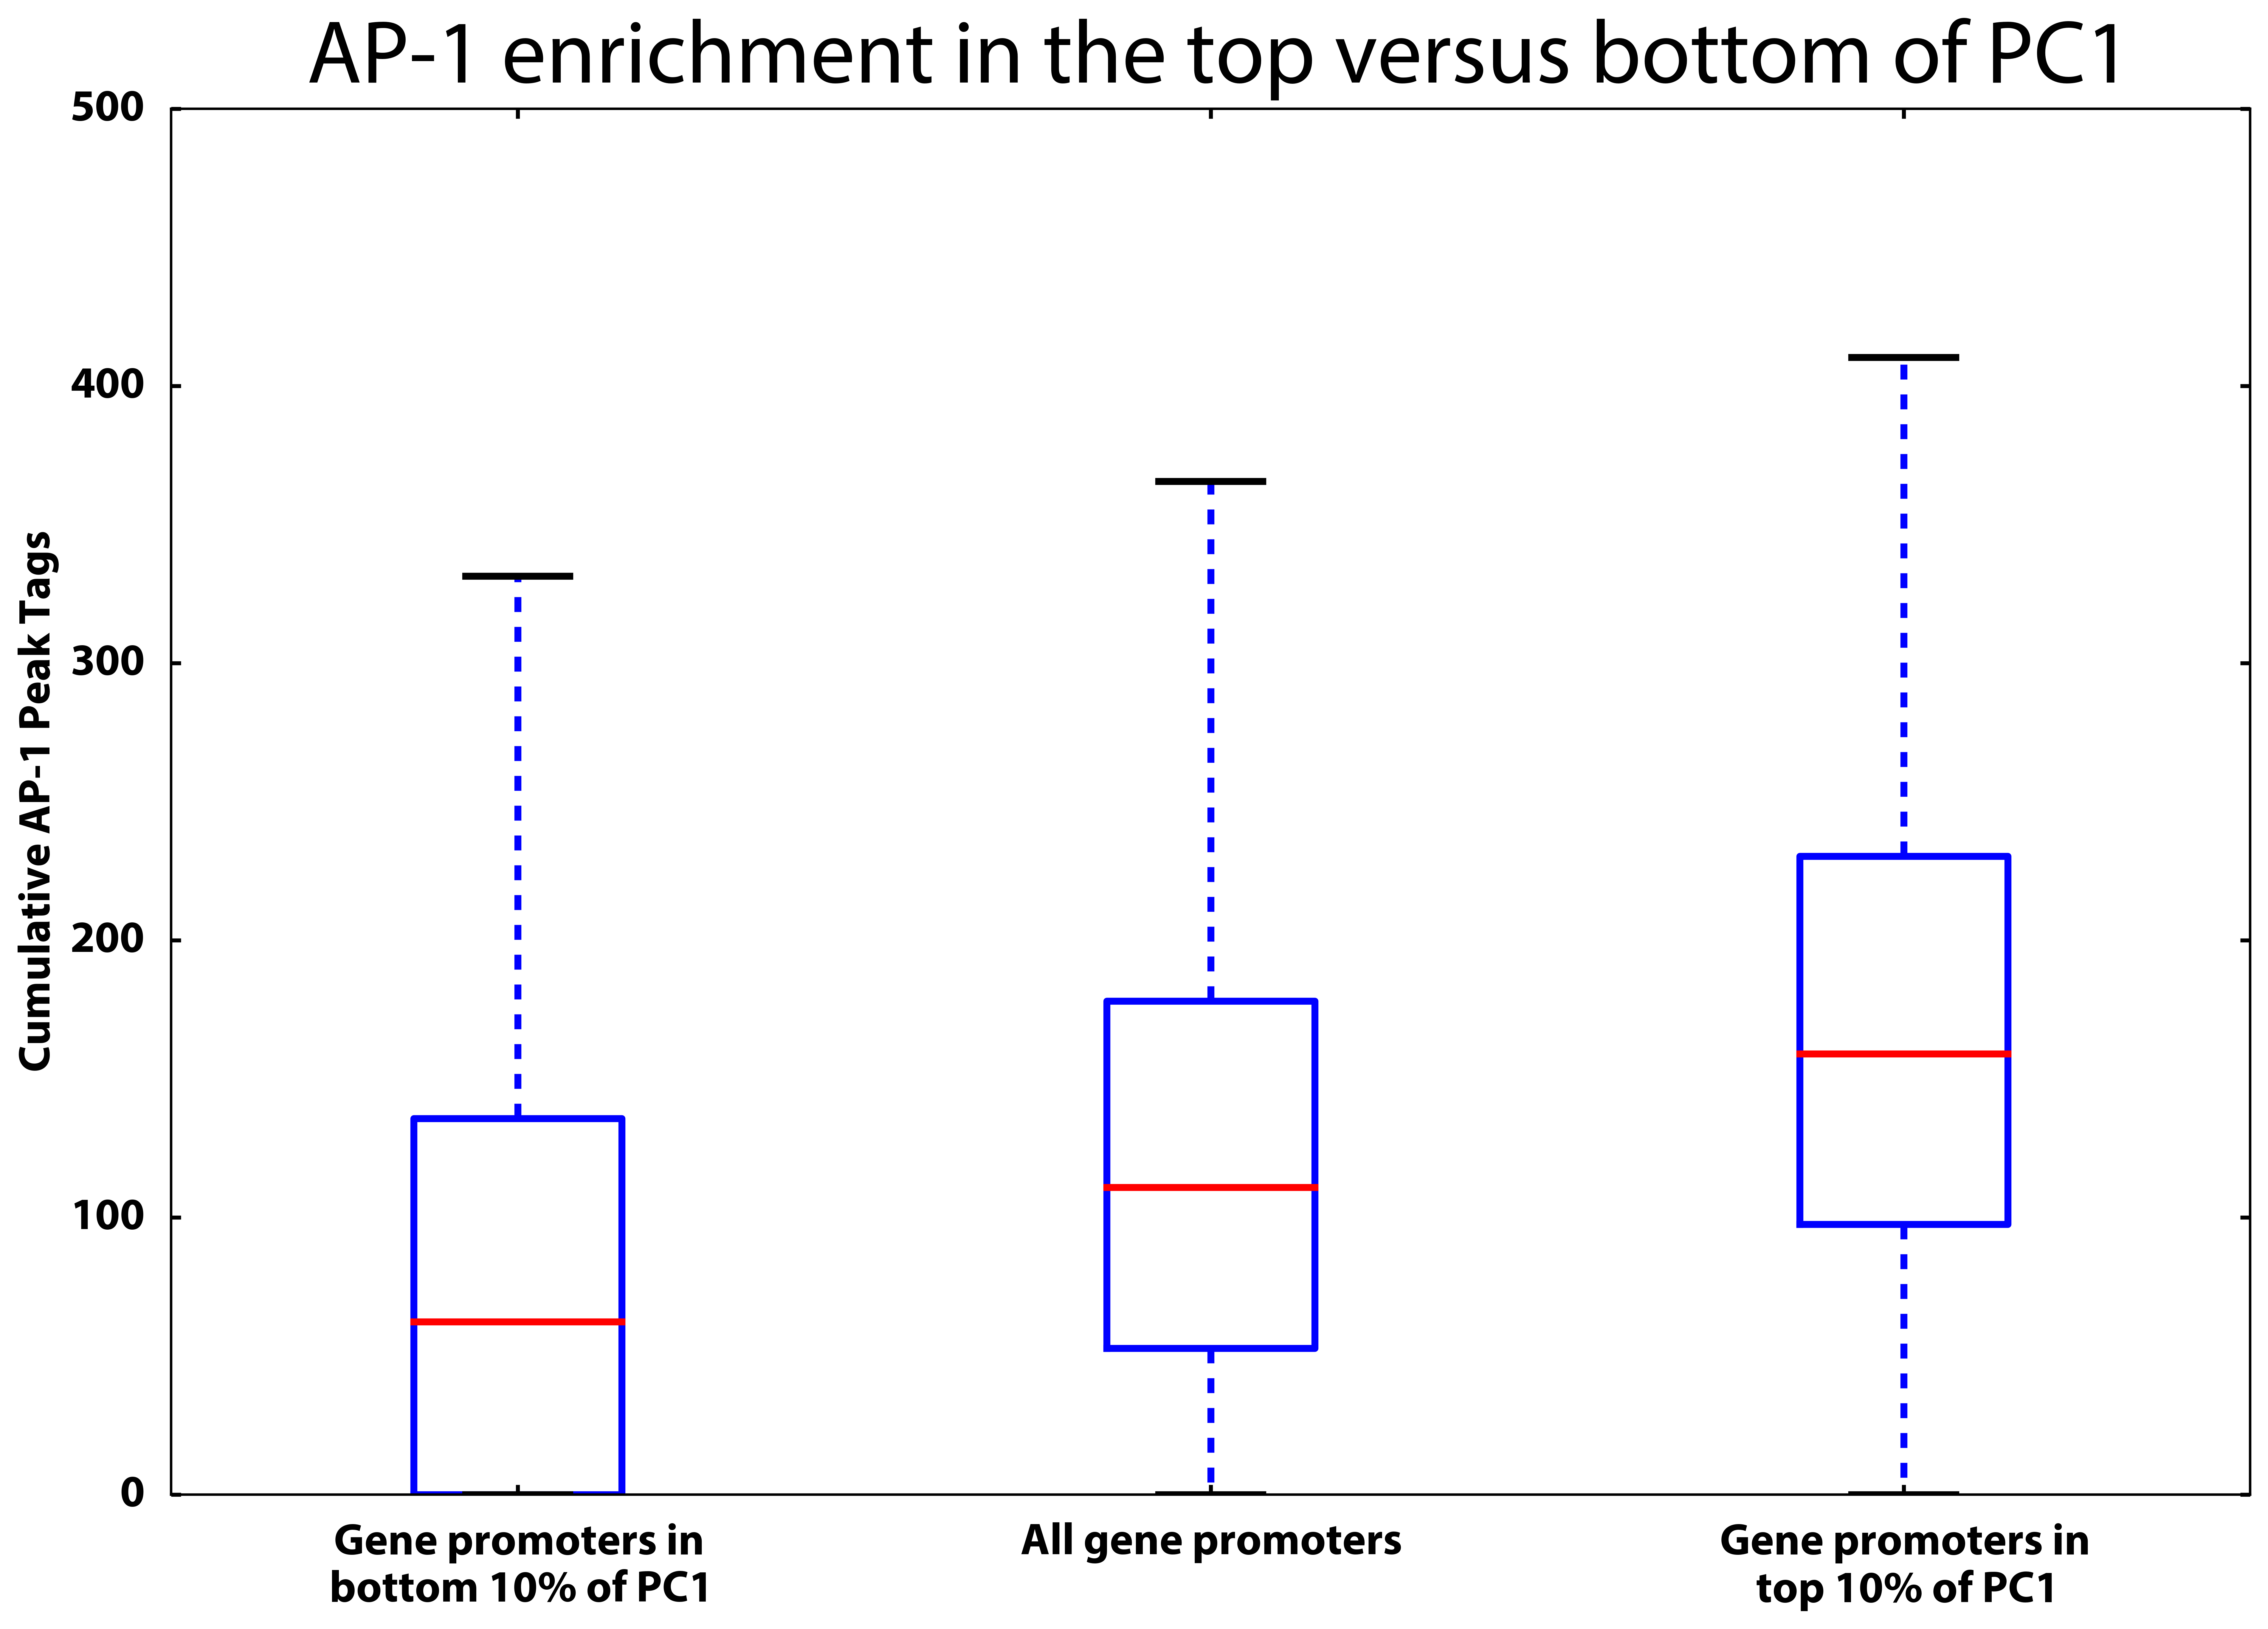

In [9]:
# Box plots of top versus bottom.
pc1_ap1_sorted = pca_ap1.sort('pc1')
ten_pct = len(pca_ap1)/10
pc1_bottom = pc1_ap1_sorted[:int(round(ten_pct))]
pc1_top = pc1_ap1_sorted[int(round(9*ten_pct)):]
plt.boxplot([pc1_bottom['ap1'], 
             pc1_ap1_sorted['ap1'],
             pc1_top['ap1']], sym='')

plt.ylim([0,500])

plt.ylabel('Cumulative AP-1 Peak Tags')
plt.xticks([1,2,3],
           ['Gene promoters in\nbottom 10% of PC1',
            'All gene promoters',
            'Gene promoters in\ntop 10% of PC1',])

title = 'AP-1 enrichment in the top versus bottom of PC1'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

In [10]:
# Pairwise statistical significance?
from scipy.stats import ttest_ind

print(ttest_ind(pc1_bottom['ap1'], pc1_ap1_sorted['ap1']))
print(ttest_ind(pc1_top['ap1'], pc1_ap1_sorted['ap1']))
print(ttest_ind(pc1_top['ap1'], pc1_bottom['ap1']))

(-4.9791289609244238, 6.7096054112736816e-07)
(7.3746547389072674, 2.0661350641133646e-13)
(8.5171671296463032, 1.285075287081523e-16)


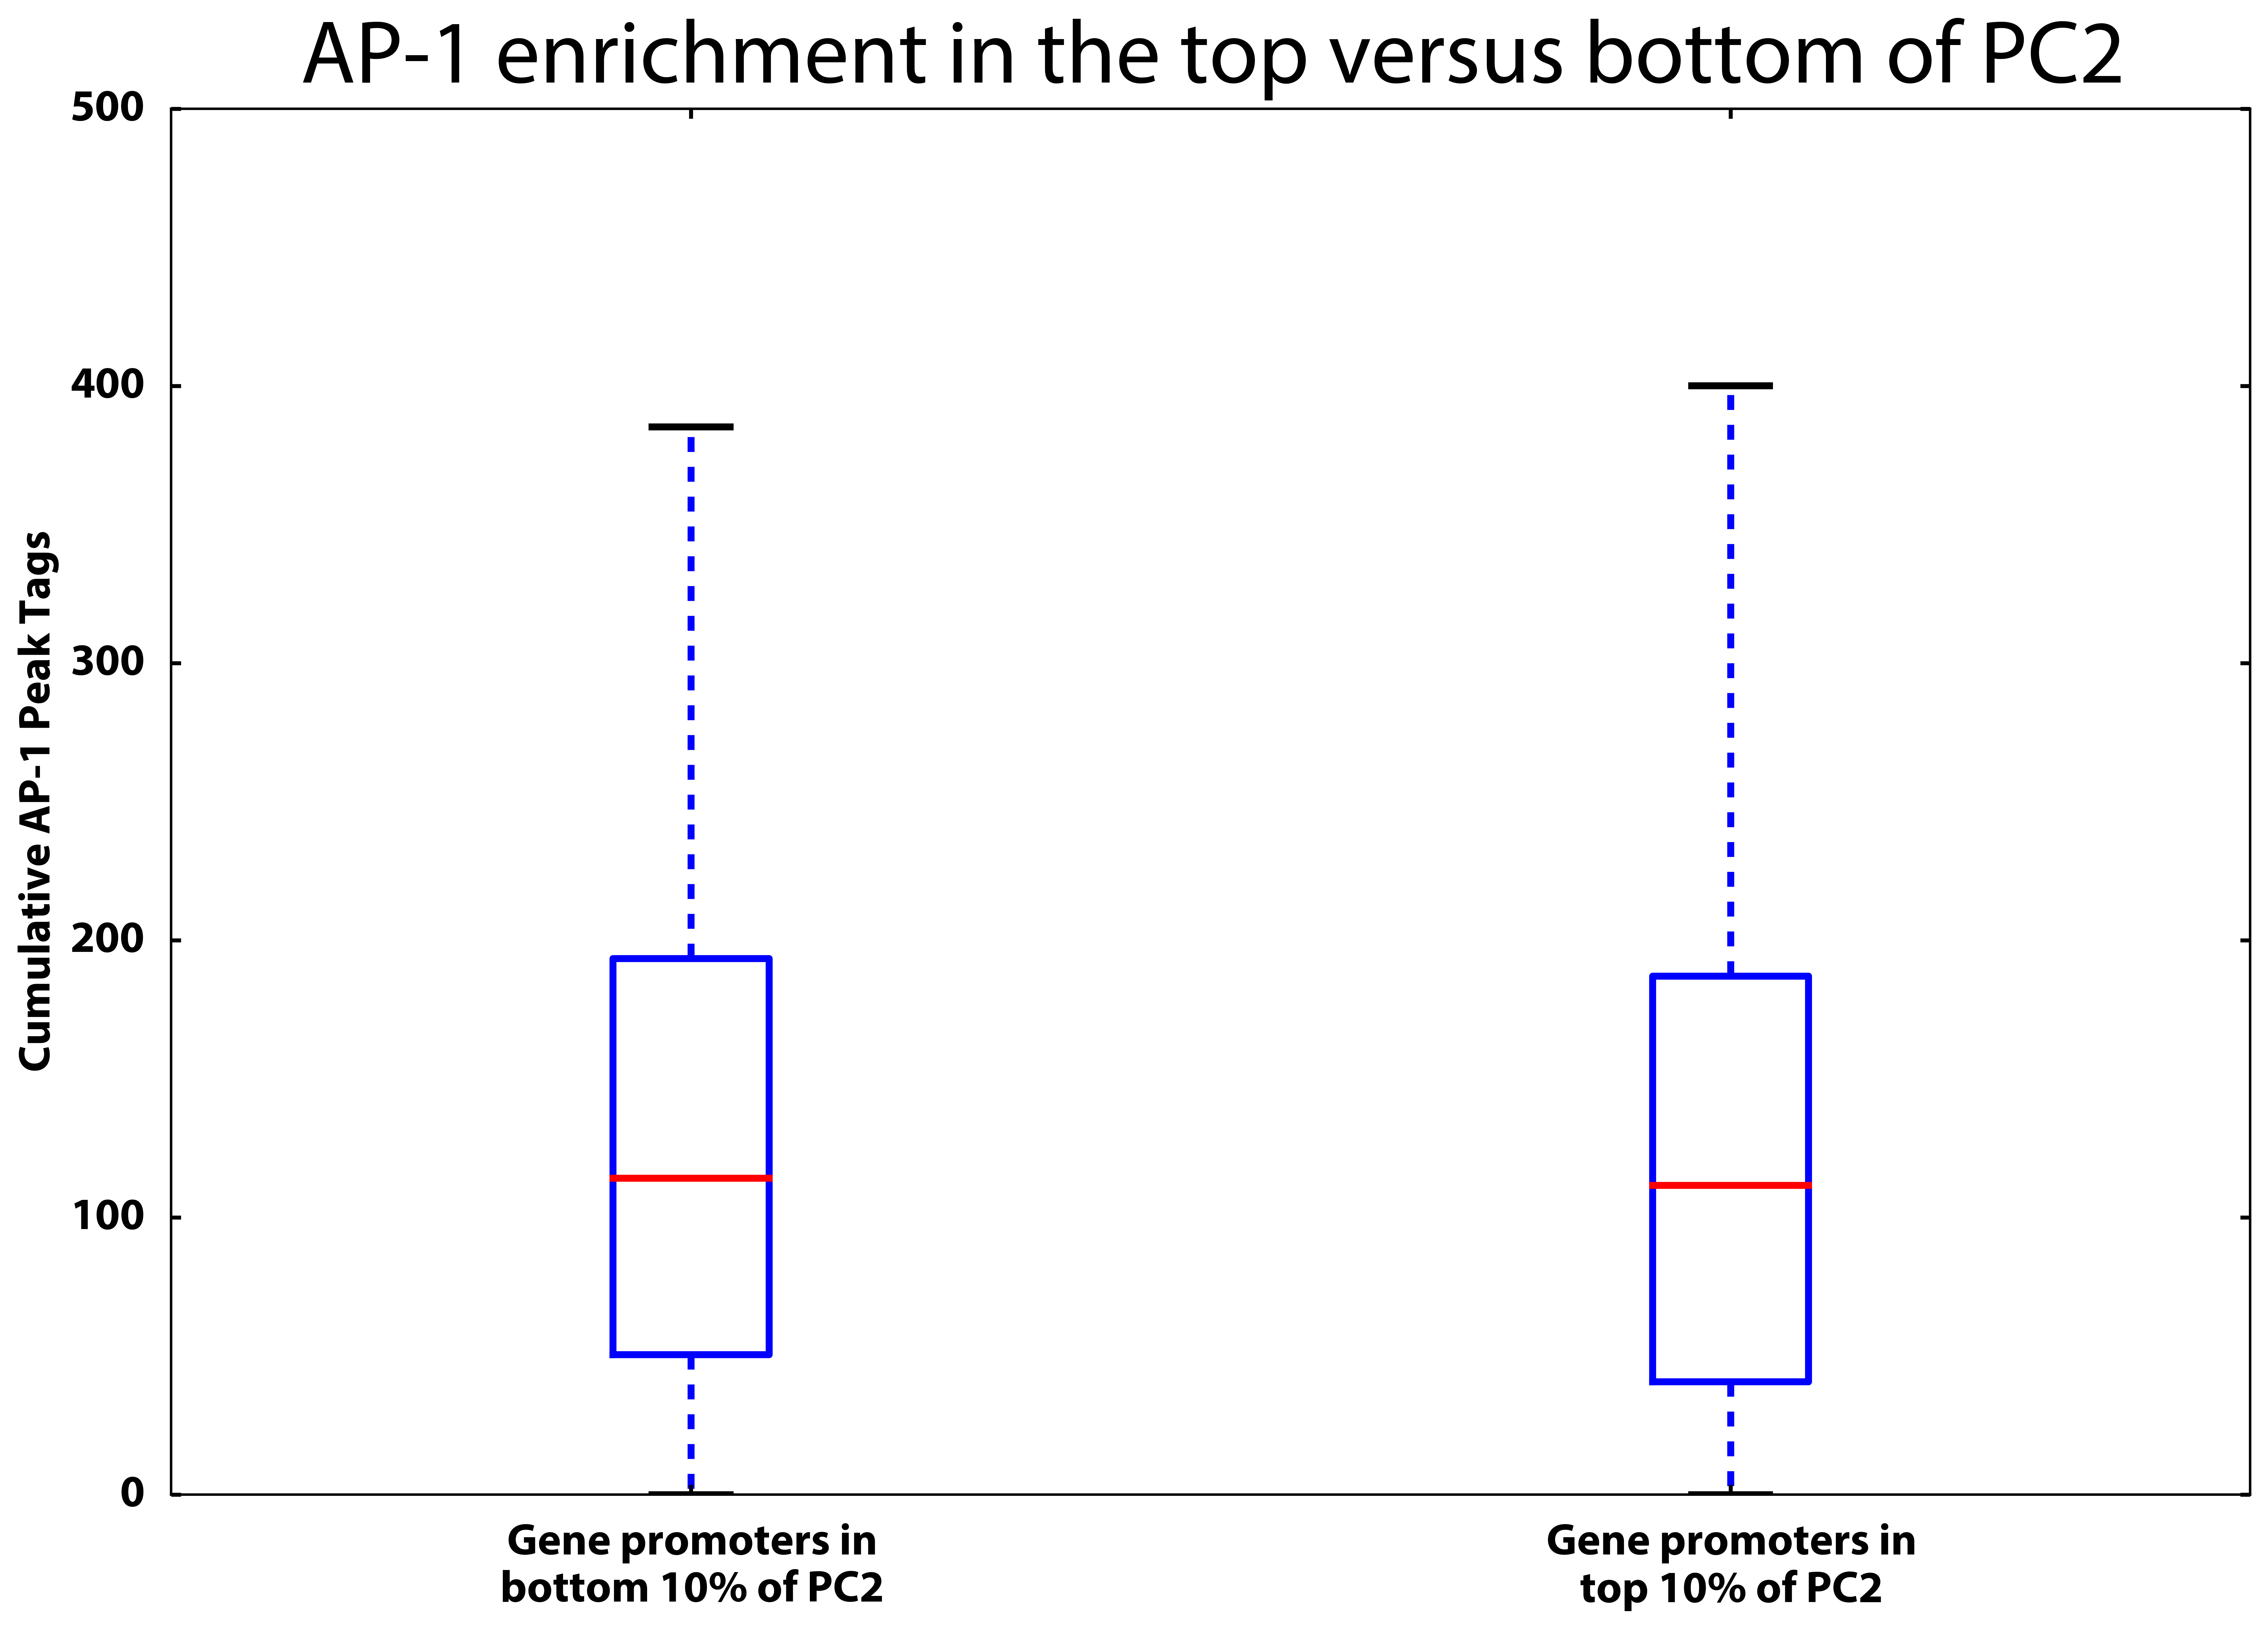

In [12]:
# Box plots of top versus bottom.
pca_ap1_sorted = pca_ap1.sort('pc2')
ten_pct = len(pca_ap1)/10
plt.boxplot([pca_ap1_sorted[:int(ten_pct)]['ap1'], 
             pca_ap1_sorted[int(9*ten_pct):]['ap1']])
plt.ylim([0,500])

plt.ylabel('Cumulative AP-1 Peak Tags')
plt.xticks([1,2],
           ['Gene promoters in\nbottom 10% of PC2',
            'Gene promoters in\ntop 10% of PC2',])

title = 'AP-1 enrichment in the top versus bottom of PC2'
plt.title(title, y=1.01)

plt.savefig('figures/{}'.format(title.replace(' ','_')),
            bbox_inches='tight')

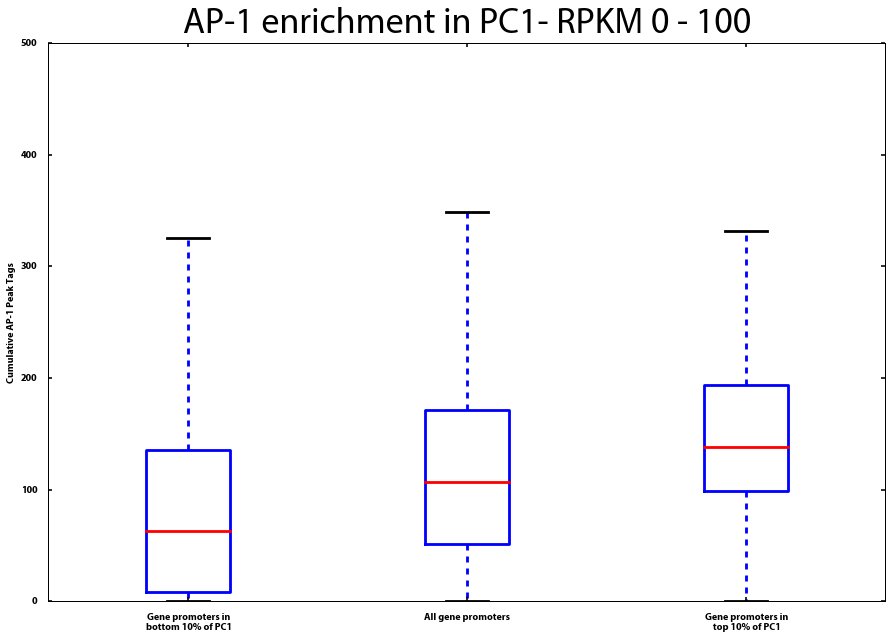

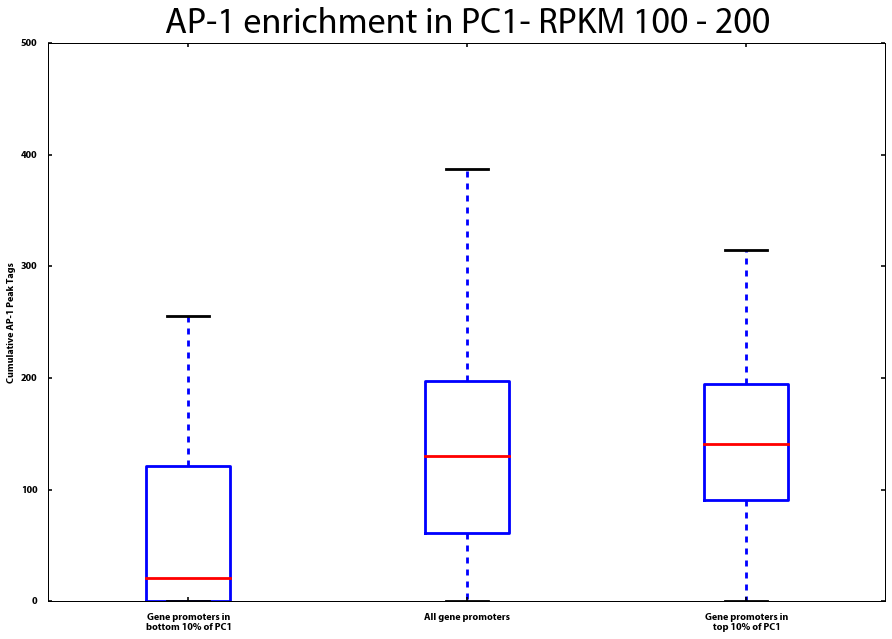

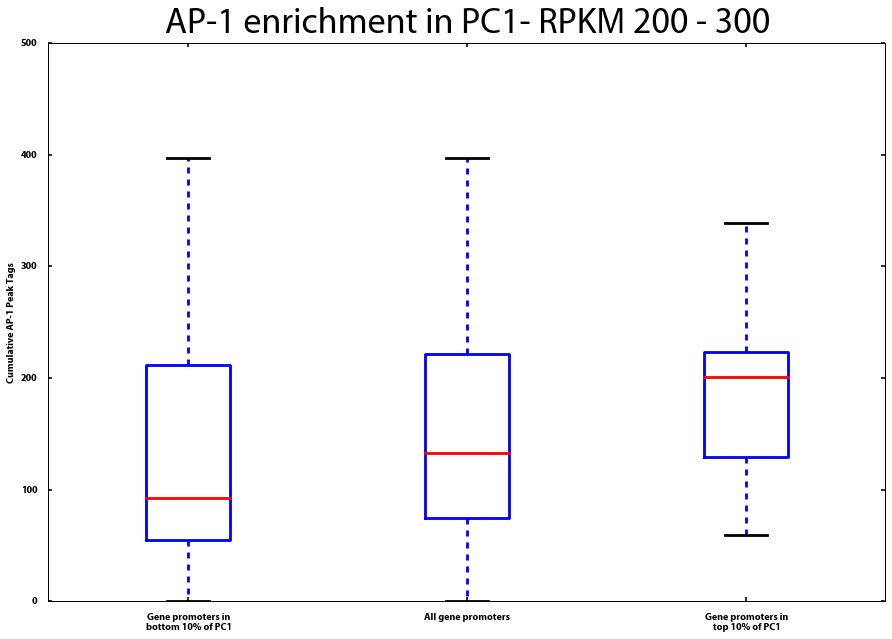

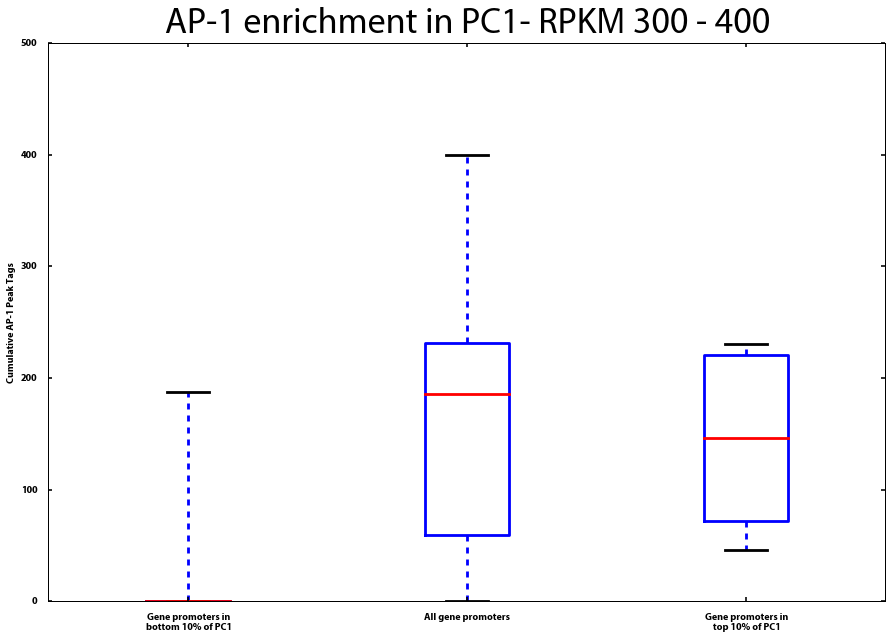

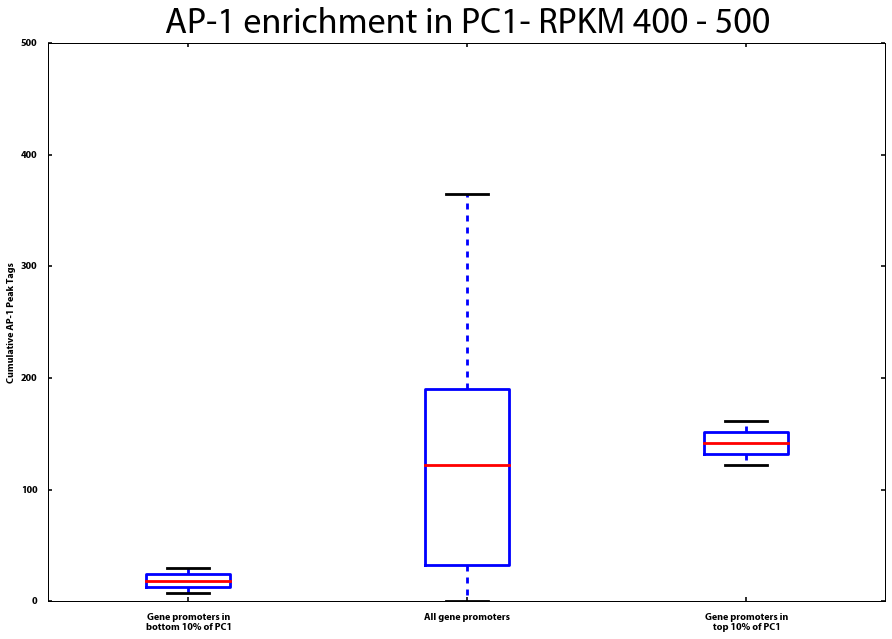

In [16]:
# Box plots of top versus bottom split out by RPKM.
size = 100
for rpkm_min in range(0, 2000, size):
    rpkm_mask = (pca_ap1.filter(regex=r'.*-24h').max(axis=1) >= rpkm_min) \
                & (pca_ap1.filter(regex=r'.*-24h').max(axis=1) < (rpkm_min + size))
    rpkm_subset = pca_ap1[rpkm_mask]
    
    if len(rpkm_subset) < 20: continue
    
    plt.figure(figsize=[15, 10])
    pc1_ap1_sorted = rpkm_subset.sort('pc1')
    ten_pct = len(rpkm_subset)/10
    pc1_bottom = pc1_ap1_sorted[:int(round(ten_pct))]
    pc1_top = pc1_ap1_sorted[int(round(9*ten_pct)):]
    plt.boxplot([pc1_bottom['ap1'], 
                 pc1_ap1_sorted['ap1'],
                 pc1_top['ap1']], sym='')

    plt.ylim([0,500])

    plt.ylabel('Cumulative AP-1 Peak Tags')
    plt.xticks([1,2,3],
               ['Gene promoters in\nbottom 10% of PC1',
                'All gene promoters',
                'Gene promoters in\ntop 10% of PC1',])

    title = 'AP-1 enrichment in PC1- RPKM {} - {}'.format(rpkm_min, rpkm_min + size)
    plt.title(title, y=1.01)

    plt.savefig('figures/{}'.format(title.replace(' ','_')),
                bbox_inches='tight')